# 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline  

## 0.1. Helper Functions

In [2]:
def bundleTime(hour):
    # Receives an Hour from 0 to 23 and return which is the correspondent part of the day. E.g: Receives 9, returns Morning. 

    dict_time = {
        **dict.fromkeys(range(0,7), 'Late Night'), 
        **dict.fromkeys(range(7,13), 'Morning'),
        **dict.fromkeys(range(13,19), 'Afternoon'),
        **dict.fromkeys(range(19,24), 'Night')
    }
    
    return dict_time.get(hour, 'outside of range(0,23)')

def to_percent(y, position):
    # Find the numeric value of each bar in a bar plot and return its value with a % sign.
    
    s = str(int(100*y))
    return s + '%'

## 0.2. Loading Data

In [3]:
df_raw = pd.read_csv('google_analytics_raw.csv')

# 1. Data Description 

In [4]:
df_raw.sample(10)

,visitId,fullVisitorId,date,channelGrouping,socialEngagementType,visits,newVisits,hits,pageviews,bounces,...,pagePath,hostname,pageTitle,pagePathLevel1,pagePathLevel2,socialNetwork,eventCategory,eventAction,eventLabel,eventValue
378948,1613065009,3.627711e+18,20210211,Organic Search,Not Socially Engaged,1.0,1.0,75,3.0,NaN,...,ton.stone.com.br/checkout/,ton.stone.com.br,Ton,ton.stone.com.br/,/checkout/,(not set),Se Liga no Ton,Selecionar parcelamento em 12x,Checkout - Selecionar parcelamento em 12x,NaN
218857,1613036629,2.672430e+18,20210211,Referral,Not Socially Engaged,1.0,1.0,14,2.0,NaN,...,ton.stone.com.br/checkout/,ton.stone.com.br,Ton,ton.stone.com.br/,/checkout/,(not set),Se Liga no Ton,Selecionar pagamento via boleto,Checkout - Selecionar pagamento via boleto,NaN
207238,1613056219,7.132075e+18,20210211,Direct,Not Socially Engaged,NaN,NaN,13,NaN,NaN,...,www.stone.com.br/,www.stone.com.br,Stone - Produtos financeiros muito além da Maq...,www.stone.com.br/,/,(not set),Web Vitals,FCP,1613056222206-8293003184775,2276.0
348165,1613075288,6.140935e+18,20210211,Referral,Not Socially Engaged,1.0,NaN,35,10.0,NaN,...,www.stone.com.br/contrato/,www.stone.com.br,Contrato | Stone,www.stone.com.br/,/contrato/,(not set),WIDGET_SITE,OPEN_WIDGET,WITHOUT_TEXT,NaN
41585,1613052642,5.956121e+18,20210211,Social,Not Socially Engaged,NaN,NaN,2,NaN,NaN,...,www.stone.com.br/maquina-de-cartao/?utm_adname...,www.stone.com.br,Máquina de Cartão Stone - Tenha sua Maquininha...,www.stone.com.br/,/maquina-de-cartao/,(not set),Next.js Custom Metric,Next.js-Hydration,1613052638665-4820028307236,3324.0
162434,1613046574,4.534044e+18,20210211,Social,Not Socially Engaged,1.0,NaN,9,NaN,NaN,...,www.stone.com.br/maquina-de-cartao/?fbclid=IwA...,www.stone.com.br,Máquina de Cartão Stone - Tenha sua Maquininha...,www.stone.com.br/,/maquina-de-cartao/,(not set),Web Vitals,TTFB,1613047032901-9627025809740,1678.0
6036,1613071687,5.284827e+18,20210211,Social,Not Socially Engaged,1.0,1.0,1,1.0,1.0,...,www.ton.com.br/?tax=select-1&fbclid=IwAR2E9iTR...,www.ton.com.br,"Ton: Maquininha de cartão, cartão pré-pago, co...",www.ton.com.br/,/?tax=select-1&fbclid=IwAR2E9iTRzOEoYh_2YsBNxL...,Facebook,NaN,NaN,NaN,NaN
45792,1613077166,3.961179e+18,20210211,Paid Search,Not Socially Engaged,1.0,NaN,3,2.0,NaN,...,www.ton.com.br/,www.ton.com.br,"Ton: Maquininha de cartão, cartão pré-pago, co...",www.ton.com.br/,/,(not set),NaN,NaN,NaN,NaN
293928,1613068697,2.606755e+18,20210211,Organic Search,Not Socially Engaged,1.0,NaN,21,3.0,NaN,...,www.stone.com.br/,www.stone.com.br,Stone - Produtos financeiros muito além da Maq...,www.stone.com.br/,/,(not set),Next.js Custom Metric,Next.js-Hydration,1613068697476-5773399913087,141.0
395317,1613076659,1.240094e+17,20210211,Social,Not Socially Engaged,1.0,1.0,1,1.0,1.0,...,www.ton.com.br/?tax=select-1&utm_ID=2384535325...,www.ton.com.br,"Ton: Maquininha de cartão, cartão pré-pago, co...",www.ton.com.br/,/?tax=select-1&utm_ID=23845353257640091&utm_ad...,(not set),NaN,NaN,NaN,NaN


## 1.1. Data Dimensions 

In [5]:
print("Number of Rows: {}".format(df_raw.shape[0]))
print('Number of Cols: {}'.format(df_raw.shape[1]))

Number of Rows: 426343
Number of Cols: 43


## 1.2. Data Types

In [6]:
df_raw.dtypes

visitId                        int64
fullVisitorId                float64
date                           int64
channelGrouping               object
socialEngagementType          object
visits                       float64
newVisits                    float64
hits                           int64
pageviews                    float64
bounces                      float64
sessionQualityDim              int64
timeOnSite                   float64
timeOnScreen                 float64
browser                       object
operatingSystem               object
isMobile                        bool
mobileDeviceBranding          object
mobileDeviceMarketingName     object
deviceCategory                object
country                       object
region                        object
city                          object
campaign                      object
source                        object
medium                        object
hitNumber                      int64
time                           int64
h

## 1.3. Filtering Data

 Your team is only responsible for the following pages (hostname) "adquira.stone.com.br" and "www.stone.com.br".
 
 Our team was concerned about the digital marketing results on a specific date 11/02/2021 and they asked your help in order to deeply understand what's happening on this specific date.
 

In [7]:
# Seeing all the possibilities we have

all_dates = set(df_raw['date'])
all_pages = set(df_raw['hostname'])
print(f'The dataframe "df_raw" contains information about the following days:\n {all_dates}', end='\n\n')
print(f'The dataframe "df_raw" contains information about the following pages:\n {all_pages}')

The dataframe "df_raw" contains information about the following days:
 {20210210, 20210211}

The dataframe "df_raw" contains information about the following pages:
 {'adquira.stone.com.br', 'stone.helpjuice.com', 'ajuda.stone.com.br', 'ton.stone.com.br', 'seja.stone.com.br', 'www-stg.stone.com.br', 'www.ton.com.br', 'www.vendamaispelasredessociais.com.br', 'zles2zxf7ccv2kqnv33fqu745m-adwhj77lcyoafdy-ton-stone-com-br.translate.goog', 'portalbeta.stone.com.br', 'ton.stone.com.br.googleweblight.com', '6affxghojqydtmh7eqq67k7oe4-adwhj77lcyoafdy-www-ton-com-br.translate.goog', 'ajuda.stone.com.br.googleweblight.com', 'o4unlwfvbs6e723gfvl24bmpjm-adwhj77lcyoafdy-www-ton-com-br.translate.goog', 'www.mlabs.com.br', 'zles2zxf7ccv2kqnv33fqu745m--ton-stone-com-br.translate.goog', 'experimente.stone.com.br', 'rendaextraton.com.br', 'www.vendamaisnasredessociais.com.br', 'quero.stone.com.br', 'sdx.ton.stone.com.br', 'lp.stone.com.br', 'cadastro.stone.com.br', 'portal-staging.stone.com.br', 'www.ton.

In [8]:
#backup copy
df1 = df_raw.copy()

#filtering data
df1 = df1[((df1.hostname == "www.stone.com.br") | (df1.hostname == "adquira.stone.com.br")) & (df1.date == 20210211 )]

## 1.4. Check NA

In [9]:
df1.isna().sum()

visitId                           0
fullVisitorId                     0
date                              0
channelGrouping                   0
socialEngagementType              0
visits                       112485
newVisits                    154555
hits                              0
pageviews                    143623
bounces                      308377
sessionQualityDim                 0
timeOnSite                   114626
timeOnScreen                 313651
browser                           0
operatingSystem                   0
isMobile                          0
mobileDeviceBranding         135178
mobileDeviceMarketingName    135178
deviceCategory                    0
country                           0
region                            0
city                              0
campaign                          0
source                            0
medium                            0
hitNumber                         0
time                              0
hour                        

We do have NaN values in the "visits" attributes. Those rows (112.485 rows, 26% of the data) will be discarted, since we are focusing in visits in this study, although it is important to know what have happened and how to prevent it, so we avoid losing information in next analysis.

In the other hand, we don't have NaN values in the other attributes needed ("fullVisitorId", "deviceCategory", "hour", "pagePath").

## 1.5 Remove NA

In [10]:
df1 = df1[df1['visits'].notna()]
df1.isna().sum()

visitId                           0
fullVisitorId                     0
date                              0
channelGrouping                   0
socialEngagementType              0
visits                            0
newVisits                    104660
hits                              0
pageviews                     31138
bounces                      195892
sessionQualityDim                 0
timeOnSite                     2141
timeOnScreen                 201166
browser                           0
operatingSystem                   0
isMobile                          0
mobileDeviceBranding          96345
mobileDeviceMarketingName     96345
deviceCategory                    0
country                           0
region                            0
city                              0
campaign                          0
source                            0
medium                            0
hitNumber                         0
time                              0
hour                        

# 2. Business Questions

## 2.1. Question 1

### 2.1.1 What is the distribution of visits, in percentage, per Device Category?

In [11]:
# Summing the visits
df1_1 = df1[['visits', 'deviceCategory']].groupby(by = 'deviceCategory').sum()

# Dividing the visits by each category by the total visits to get the percentage
df1_1['percentage'] = df1_1.apply(lambda x: x/df1_1.visits.sum())
df1_1

,visits,percentage
deviceCategory,,
desktop,96473.0,0.479569
mobile,104282.0,0.518388
tablet,411.0,0.002043


#### Awnser Question 1.1

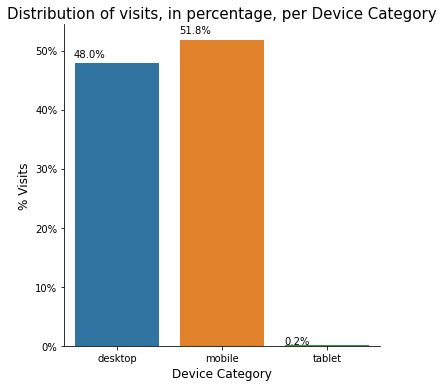

In [12]:
g = sns.catplot(data=df1_1, kind="bar", x = df1_1.index, y="percentage")
plt.title('Distribution of visits, in percentage, per Device Category', fontsize = 15)
g.set_axis_labels("Device Category", "% Visits", fontsize = 12)

# Change y axis to %
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# Annotation above the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}%'.format(p.get_height()*100),
            color='black', 
            rotation='horizontal', 
            size='medium')

plt.show()

### 2.1.2 What is the distribution of visitors, in percentage, per Device Category?

In [13]:
df1_2 = pd.DataFrame( df1.groupby(by = 'deviceCategory').fullVisitorId.apply(lambda x: x.nunique()))
df1_2['percentage'] = df1_2.apply(lambda x: x/df1_2.fullVisitorId.sum())
df1_2

,fullVisitorId,percentage
deviceCategory,,
desktop,9524,0.563951
mobile,7324,0.433681
tablet,40,0.002369


#### Awnser Question 1.2

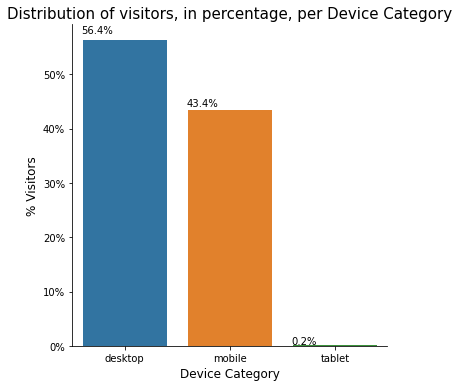

In [14]:
g = sns.catplot(data=df1_2, kind="bar", x = df1_2.index, y="percentage", label='medium')
plt.title('Distribution of visitors, in percentage, per Device Category', fontsize=15)
g.set_axis_labels("Device Category", "% Visitors", fontsize = 12)

# Change y axis to %
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# Annotation above the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01, 
            p.get_height() * 1.02, 
           '{0:.1f}%'.format(p.get_height()*100),
            color='black', 
            rotation='horizontal', 
            size='medium')

plt.show()

## 2.2. Question 2

In [15]:
# DataFrame backup
df2 = df1.copy()

### 2.2.1 How many visitors and visits we had on 2021-02-11?

#### Awnser Question 2.1

In [16]:
# Assuming each fullVisitorId correspond to one visitor

print(f'in 2021-02-11, we had {int(df2.visits.sum())} visits.')
print(f'in 2021-02-11, we had {int(len(set(df2.fullVisitorId)))} visitors.')

in 2021-02-11, we had 201166 visits.
in 2021-02-11, we had 16886 visitors.


### 2.2.2. Considering only www.stone.com.br/maquina-de-cartao, how many visitors and visits we had on this date?

#### Awnser Question 2.2

In [17]:
df2_2 = df2[df2.pagePath.str.contains('www.stone.com.br/maquina-de-cartao')]

print(f'in 2021-02-11, considering only www.stone.com.br/maquina-de-cartao, we had {int(df2_2.visits.sum())} visits.')
print(f'in 2021-02-11, considering only www.stone.com.br/maquina-de-cartao, we had {int(len(set(df2_2.fullVisitorId)))} visitors.')

in 2021-02-11, considering only www.stone.com.br/maquina-de-cartao, we had 59887 visits.
in 2021-02-11, considering only www.stone.com.br/maquina-de-cartao, we had 6179 visitors.


## 2.3. Question 3

In [18]:
df3 = df2.copy()

## 2.3.1.  One important metric at digital marketing is to understand our main source of traffic (e.g: google, facebook or direct) and how this change over the day. Our team is worried if there is any significant source variation during the period of the day (more details below) at our main Landing Page (www.stone.com.br/maquina-de-cartao)?

Late Night = 0h to 6h

Morning = 7h to 12h

Afternoon = 13h to 18h

Night = 19h to 23h

In [19]:
# Filtering the pagePath that contains the landing page specified
df3_1 = df3[df3.pagePath.str.contains('www.stone.com.br/maquina-de-cartao')]

# Seeing how many visits we have in each hour for a determined source
df3_1 = pd.DataFrame(df3_1.groupby('source').hour.value_counts())
df3_1.rename(columns = {'hour': 'visits'}, inplace = True)
df3_1 = df3_1.sort_values(['source', 'hour']).reset_index()
df3_1

,source,hour,visits
0,(direct),0,5
1,(direct),2,6
2,(direct),6,9
3,(direct),7,14
4,(direct),8,25
...,...,...,...
148,ton.com.br,15,21
149,ton.com.br,16,1
150,ton.com.br,18,12
151,youtube.com,11,9


In [20]:
# Grouping hours in different categories and summing the total visits
df3_1['bundledTime'] = df3_1['hour'].apply(lambda x: bundleTime(x))
df3_2 = pd.DataFrame(df3_1.groupby(['source', 'bundledTime']).agg({'visits':sum}))
df3_2

visits
source                    bundledTime        
(direct)                  Afternoon       225
                          Late Night       20
                          Morning         215
                          Night            89
bing                      Afternoon      1012
                          Late Night       46
                          Morning         762
                          Night           262
blog.lexos.com.br         Night             7
calculadoradetaxas.com.br Morning           6
cortesia                  Afternoon         6
crm                       Night             6
facebook.com              Night             4
fb                        Afternoon     11940
                          Late Night     1012
                          Morning       12676
                          Night          3661
google                    Afternoon     10344
                          Late Night     1417
                          Morning        9797
                          Night          5190
googleweblight.com        Late Night        2
ig                        Afternoon         7
                          Morning          16
l.facebook.com            Afternoon        28
                          Late Night        2
                          Morning          48
                          Night             1
l.wl.co                   Afternoon         7
                          Night             1
m.facebook.com            Afternoon         7
                          Morning          16
my.stripo.email           Morning          11
portal                    Night            12
social                    Afternoon        66
                          Morning          30
                          Night            33
stone.com.br/ton          Night             1
stone.force.com           Afternoon        11
                          Morning           4
suno.com.br               Afternoon         6
tiktok                    Afternoon       204
                          Morning         509
                          Night            71
ton.com.br                Afternoon        45
                          Late Night        6
                          Morning          30
youtube.com               Morning           9
                          Night             7

In [21]:
# Getting the top3 sources and "(direct)" which is included in the question
df3_3 = df3_2.loc[['google', 'fb', '(direct)', 'bing']]
df3_3

visits
source   bundledTime        
google   Afternoon     10344
         Late Night     1417
         Morning        9797
         Night          5190
fb       Afternoon     11940
         Late Night     1012
         Morning       12676
         Night          3661
(direct) Afternoon       225
         Late Night       20
         Morning         215
         Night            89
bing     Afternoon      1012
         Late Night       46
         Morning         762
         Night           262

In [22]:
df3_4 = df3_3.unstack()[[('visits', 'Morning'),
       ('visits', 'Afternoon' ),
       ('visits','Night' ),
       ('visits','Late Night')]]
df3_4

visits                           
bundledTime Morning Afternoon Night Late Night
source                                        
google         9797     10344  5190       1417
fb            12676     11940  3661       1012
(direct)        215       225    89         20
bing            762      1012   262         46

#### Awnser Question 3

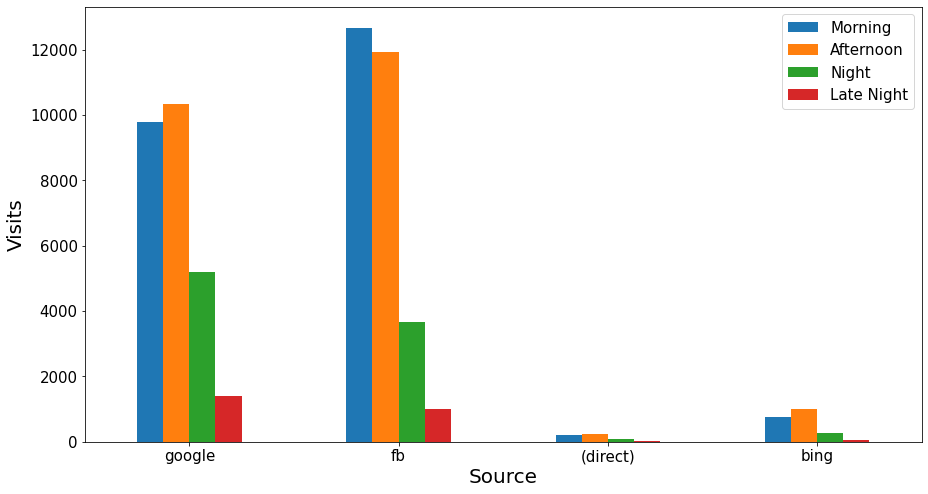

In [23]:
df3_4.visits.plot(kind = 'bar', figsize = (15,8), ylabel ='visits', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.xlabel('Source', fontsize=20)
plt.ylabel('Visits', fontsize=20)
plt.xticks(rotation=0)
plt.legend(fontsize=15);

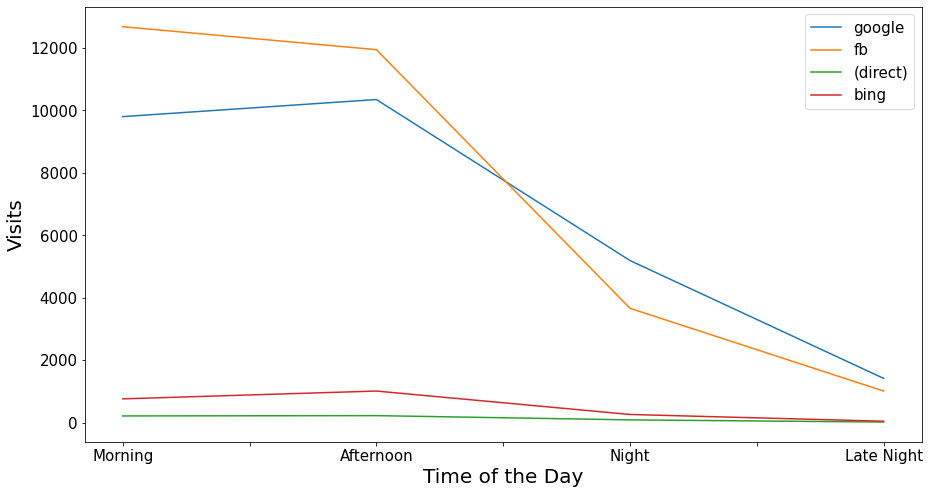

In [24]:
df3_4.visits.T.plot(kind = 'line', figsize = (15,8), ylabel ='visits', fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.xlabel('Time of the Day', fontsize=20)
plt.ylabel('Visits', fontsize=20)
# plt.xticks(rotation=45)
plt.legend(fontsize=15);

From these 2 plots we can observe that:

    Facebook is the only source that has more visits in the morning than in the afternoon.
    
    In the morning and afternoon we get more visits from Facebook, but there is a shift in the night and late night, which Google becomes the source that brings more visits.